In this notebook, we are trying to visualize the choices of a decision tree (from a random forest).

# Imports

In [32]:
%matplotlib inline
import crime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [17]:
train = crime.load_cleaned_train()
y = train.pop('CategoryNumber')

# Create Model

For this visualization, we're only using the X and Y data since that should be easy to plot on a map.

In [27]:
predictors = ['X', 'Y']
alg = RandomForestClassifier(n_estimators=1, max_depth=10)
alg.fit(train[predictors], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Create Mapping Function

In [50]:
# Following code adapted from https://www.kaggle.com/dbennett/sf-crime/test-map

# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

colors = mpl_colors.cnames.keys()[::2]  # skipping every other color gave more distinct colors

def plotOnMap(df):
    """
    Plot the given data frame on the map, coloring by category
    """
    fig = plt.figure(figsize=(15,15))
    plt.scatter(df.X, df.Y, c=df.CategoryNumber, alpha=0.5)
    for ax in fig.axes:
        ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                  extent=lon_lat_box, 
                  aspect=asp)
    return fig

# Find Predictions and Plot

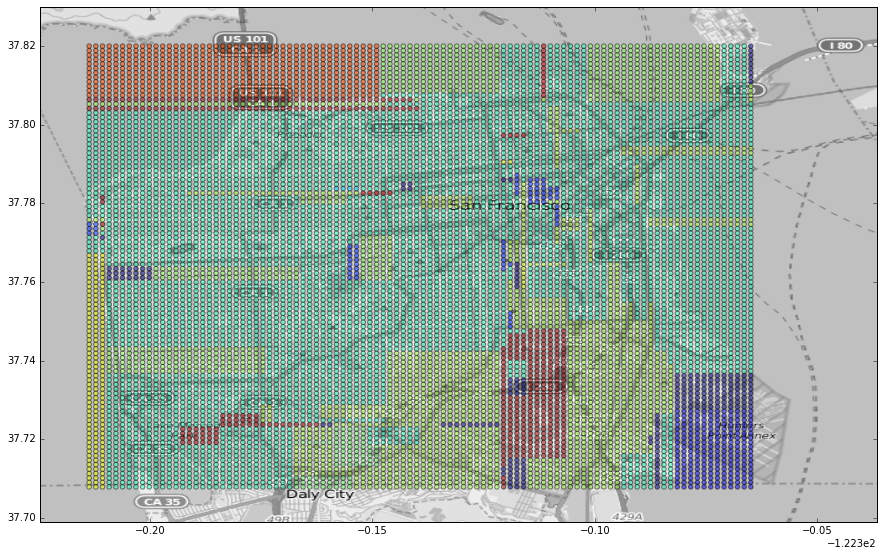

In [51]:
numX = 100
numY = 100

xyGrid = np.mgrid[:numX,:numY].reshape(2,-1).T
df = pd.DataFrame(xyGrid)
df.columns = ['X', 'Y']

minX = train.X.min()
maxX = train.X.max()
minY = train.Y.min()
maxY = train.Y.max()

df.X = df.X / df.X.max() * (maxX - minX) + minX
df.Y = df.Y / df.Y.max() * (maxY - minY) + minY

df['CategoryNumber'] = alg.predict(df)
plotOnMap(df)
pass